In [64]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Frequentist Uncertainty

The basic idea is to to represent uncertainty by calculating how a **quantity estimated from data (such as a parameter or a predicted label) would change if the data were changed**

It is this notion of variation across repeated trials that forms the basis for modeling uncertainty used by the frequentist approach. By contrast, the Bayesian approach views probability in terms of information rather than repeated trials

### Sampling Distributions

In frequentist statistics, uncertainty is not represented by the posterior distribution of a random variable, but instead by the sampling distribution of an estimator
 - An estimator is a decision procedure that specifies what action to take given some observed data
    - I.e., in parameter estimation, this could be MLE or MAP

The sampling distribution of an estimator is the **distribution of results we would see if we applied the estimator multiple times to different datasets sampled from some distribution**

### True Model: $p(x \vert \theta^*)$

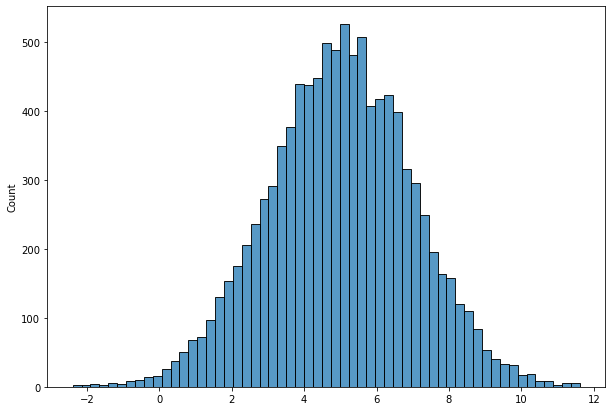

In [34]:
# True model
true_model = stats.norm(5, 2).rvs(10000)

plt.figure(figsize=(10, 7))
sns.histplot(true_model)
plt.show()

In [35]:
# Sampling "S" datasets, of size "N" from our true model
S1 = np.random.choice(true_model, 100, replace=True)
S2 = np.random.choice(true_model, 100, replace=True)
S3 = np.random.choice(true_model, 100, replace=True)
S4 = np.random.choice(true_model, 100, replace=True)
S5 = np.random.choice(true_model, 100, replace=True)

In [58]:
def maximum_likelihood(D, means, stds):
    log_likelihood = np.array([np.sum(stats.norm(mean, std).logpdf(D))
                for mean, std in zip(means, stds)])
    idx = np.argwhere(log_likelihood == log_likelihood.max())[0][0]
    
    return [round(means[idx], 2), round(stds[idx], 2)]

In [59]:
means = np.linspace(0.1, 10, 100)
stds = np.linspace(0.1, 5, 100)

In [60]:
S1_params = maximum_likelihood(S1, means, stds)
S2_params = maximum_likelihood(S2, means, stds)
S3_params = maximum_likelihood(S3, means, stds)
S4_params = maximum_likelihood(S4, means, stds)
S5_params = maximum_likelihood(S5, means, stds)

In [67]:
df = pd.DataFrame({'D': ['S1',
                         'S2',
                         'S3',
                         'S4',
                         'S5'],
                    'mean': [S1_params[0],
                             S2_params[0],
                             S3_params[0],
                             S4_params[0],
                             S5_params[0]],
                    'std': [S1_params[1],
                             S2_params[1],
                             S3_params[1],
                             S4_params[1],
                             S5_params[1]]})

In [68]:
df

,D,mean,std
0,S1,4.5,2.28
1,S2,4.7,2.38
2,S3,4.8,2.43
3,S4,4.8,2.43
4,S5,4.4,2.23


In the context of parameter estimation, **it is the distribution** of $\hat{\theta}$, viewed as a random variable that depends on the random sample $D$. In more detail, imagine sampling $S$ different data sets, each of size $N$, from some true model $p(x \vert \theta^*)$

<AxesSubplot:xlabel='mean', ylabel='Count'>

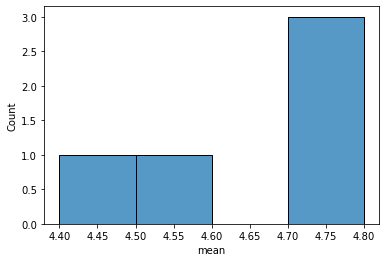

In [73]:
sns.histplot(x=df['mean'])